In [99]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
def motorcycle_post_parser(total_listings):
    client = MongoClient('localhost', 27017)
    db = client['craigslist_motorcycles']
    post_html = db['motorcycle_posts'].find()[0:total_listings:2]
    
    title = []
    year = []
    price = []
    neighborhood = []
    description = []
    url = []
    #attributes
    model = []
    vin = []
    condition = []
    cryptocurrency = []
    delivery = []
    engine_size = []
    fuel_type = []
    mileage = []
    paint_color = []
    street_legal = []
    title_status = []
    transmission = []
    bike_type = []

    iterations = 0

    for _ in post_html:         
        
        # attributes key words to parse through attributes
        vin_ = 'VIN:'
        condition_ = 'condition:'
        cryptocurrency_ = 'cryptocurrency'
        delivery_ = 'delivery'
        engine_size_ = 'engine displacement'
        fuel_type_ = 'fuel:'
        mileage_ = 'odometer:'
        paint_color_ = 'paint color:'
        street_legal_ = 'street legal'
        title_status_ = 'title status:'
        transmission_ = 'transmission:'
        bike_type_ = 'type:'  
        
        response = _['html']
        soup = BeautifulSoup(response, 'html.parser')

        try:
            post_title = soup.find('span', id = 'titletextonly')
            title.append(post_title.text)
        except:
            title.append(np.nan)
            
        try:
            year_ = parse(post_title, fuzzy=True).year
            if year_ < 2020 or year_ > 1920:
                year.append(year_)
            else:
                year.append(np.nan)
        except:
            year.append(np.nan)
        
        try:
            post_price = soup.find('span', class_ = 'price').text
            price.append(float(post_price.lstrip('$')))
        except:
            price.append(np.nan)
        
        try:
            post_neighborhood = soup.find('small')
            neighborhood.append(((post_neighborhood.text).replace(' (', '')).replace(')', ''))
        except:
            neighborhood.append(np.nan)
        
        try:
            post_description = soup.find('section', id = 'postingbody')
            description.append((post_description.text).replace('\n\nQR Code Link to This Post\n\n\n', ''))
        except:
            description.append(np.nan)
        
        url.append(_['_id'])
        
        post_attributes = str(soup.find_all('p', attrs = {'class': 'attrgroup'}))
        post_attributes = post_attributes.replace(post_attributes, str(post_attributes.replace('''[<p class="attrgroup">\n<span><b>''', '').replace('''</b></span>\n<br/>\n</p>, ''','').replace('''<p class="attrgroup">\n<span>''', ',').replace(''' <b>''', '').replace('''</b></span>\n<br/>\n<span>''', ',').replace('''</span>\n<br/>\n<span>''', ',').replace('''</b></span>\n<br/>\n</p>]''', '').replace('''<p class="attrgroup">\n<span class="otherpostings">\n<a href="//auburn.craigslist.org/search/sss?userid=193613506">\nmore ads  by this user        </a>\n</span>\n</p>]''', '')))
                    
        bike_attributes = (post_attributes.split(','))

        vin_res = [i for i in bike_attributes if vin_ in i]
        condition_res = [i for i in bike_attributes if condition_ in i]
        cryptocurrency_res = [i for i in bike_attributes if cryptocurrency_ in i]
        delivery_res = [i for i in bike_attributes if delivery_ in i]
        engine_size_res = [i for i in bike_attributes if engine_size_ in i]
        fuel_type_res = [i for i in bike_attributes if fuel_type_ in i]
        mileage_res = [i for i in bike_attributes if mileage_ in i]
        paint_color_res = [i for i in bike_attributes if paint_color_ in i]
        street_legal_res = [i for i in bike_attributes if street_legal_ in i]
        title_status_res = [i for i in bike_attributes if title_status_ in i]
        transmission_res = [i for i in bike_attributes if transmission_ in i]
        bike_type_res = [i for i in bike_attributes if bike_type_ in i]

        try:
            model.append(bike_attributes[0])
        except:
            model.append('')
                
        try:
            vin.append(str(vin_res[0]).replace('VIN:', ''))
        except:
            vin.append('')
            
        try:
            condition.append(str(condition_res[0]).replace('condition:', ''))
        except:
            condition.append('')
               
        try:
            cryptocurrency.append((cryptocurrency_res[0]))
        except:
            cryptocurrency.append('')
        
        try:
            delivery.append(delivery_res[0])
        except:
            delivery.append('')
                
        try:
            engine_size.append(float(str(engine_size_res[0]).replace('engine displacement (CC):', '')))
        except:
            engine_size.append(np.nan)
            
        try:
            fuel_type.append(str(fuel_type_res[0]).replace('fuel:', ''))
        except:
            fuel_type.append('')
            
        try:
            mileage.append(float(str(mileage_res[0]).replace('odometer:', '')))
        except:
            mileage.append(np.nan)
                    
        try:
            paint_color.append(str(paint_color_res[0]).replace('paint color:', ''))
        except:
            paint_color.append('')
                 
        try:
            street_legal.append(street_legal_res[0])
        except:
            street_legal.append('')
    
        try:
            title_status.append(str(title_status_res[0]).replace('title status:', ''))
        except:
            title_status.append('')
                
        try:
            transmission.append(str(transmission_res[0]).replace('transmission:', ''))
        except:
            transmission.append('')
            
        try:
            bike_type.append(str(bike_type_res[0]).replace('type:', ''))
        except:
            bike_type.append('')
                
        iterations += 1

        if iterations%1000 == 0:
            print(str(100*round(iterations/total_listings, 2)) + '%' + ' parsed succesfully')
    
    df_dictionary = { 'title': title, 'year': year, 'price': price, 'neighborhood': neighborhood, 'description': description, 'url':url, 'model':model, 'vin': vin, 'condition': condition, 'cryptocurrency': cryptocurrency, 'delivery': delivery, 'engine_size': engine_size, 'fuel_type': fuel_type, 'mileage': mileage, 'color': paint_color, 'street legal': street_legal, 'title status': title_status, 'transmission': transmission, 'bike type': bike_type}
    df = pd.DataFrame(df_dictionary)
    df['neighborhood'].replace('\n       google map\n        ', '', inplace=True)
#     df.replace('', np.nan, inplace=True)
    return df

In [85]:
df = motorcycle_post_parser(27562)


3.628183731224149% parsed succesfully
7.256367462448298% parsed succesfully
10.884551193672447% parsed succesfully
14.512734924896597% parsed succesfully
18.140918656120746% parsed succesfully
21.769102387344894% parsed succesfully
25.397286118569045% parsed succesfully
29.025469849793193% parsed succesfully
32.653653581017345% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname V identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


36.28183731224149% parsed succesfully
39.91002104346564% parsed succesfully
43.53820477468979% parsed succesfully
47.166388505913936% parsed succesfully
50.79457223713809% parsed succesfully
54.42275596836224% parsed succesfully
58.05093969958639% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


61.679123430810535% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname I identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


65.30730716203469% parsed succesfully
68.93549089325883% parsed succesfully
72.56367462448299% parsed succesfully
76.19185835570714% parsed succesfully
79.82004208693128% parsed succesfully
83.44822581815544% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname ACE identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


87.07640954937958% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


90.70459328060373% parsed succesfully
94.33277701182787% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CRF identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


97.96096074305203% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname NC identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Text(0.5, 1.0, 'years plotted by row')

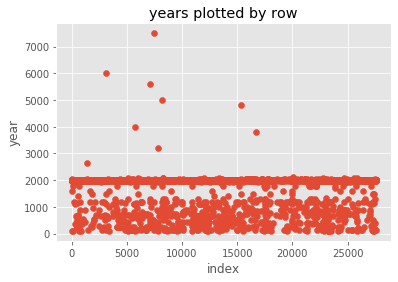

In [139]:
plt.scatter(df.index, df['year'])
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [156]:
for idx, _ in enumerate(df['year']):
    if _ > 2018:
        df['year'].replace(df['year'][idx], np.nan, inplace=True)
    elif _ < 1920:
        df['year'].replace(df['year'][idx], np.nan, inplace=True)
    else:
        pass

Text(0.5, 1.0, 'years plotted by row')

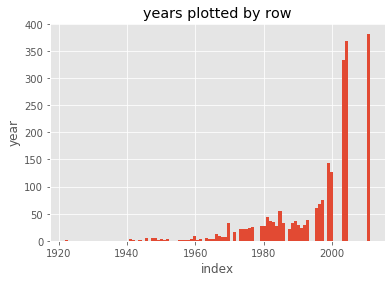

In [160]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [158]:
year_real_mean = df['year'].mean()

In [120]:
qklst = []
for idx, _ in enumerate(df['year']):
    if _ > 2020 or _ < 1920:
        qklst.append(_)

print(len(qklst))    

822


In [125]:
real_mean = df['year'][df.drop(df[(df['year'] >= 2020) or (df['year'] <= 1920)].index).index].mean()
real_mean

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [123]:
df['year'].mode()

0    2019.0
dtype: float64

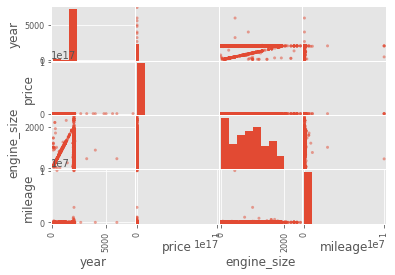

In [87]:
pd.plotting.scatter_matrix(df)
plt.show()

In [97]:
X1 = df.drop(['price', 'description', 'url'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [100]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rfc1 = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc1.fit(X1_train, y1_train)
pred1 = rfc1.predict(X1_test)

ValueError: could not convert string to float: '2018 Harley-Davidson XL883N - Sportster Iron 883 (HD18P427912)'

In [ ]:
rfc1.score(X1_test, y1_test), rfc1.oob_score_